In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Number of samples
num_samples = 200

# Random seed for reproducibility
np.random.seed(42)

# Numeric columns
ages = np.random.randint(18, 70, num_samples)  # Ages between 18 and 69
incomes = np.random.randint(20000, 100000, num_samples)  # Income from 20k to 100k

# Categorical columns
genders = np.random.choice(['Male', 'Female', 'Non-Binary'], num_samples)  # Gender distribution
cities = np.random.choice(
    ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], num_samples
)  # Random cities

# Target column indicating if a product is purchased
# Let's assume people with age between 25 and 60, income > 50000, and gender = 'Female' are more likely to purchase
product_purchased = (
    (ages > 25) & (ages < 60) & (incomes > 50000) & (genders == 'Female')
).astype(int)

# Combine into a DataFrame
df = pd.DataFrame({
    "Age": ages,
    "Income": incomes,
    "Gender": genders,
    "City": cities,
    "Product Purchased": product_purchased  # Target column
})

print("Sample of the dataset with target column:")
print(df.head())


Sample of the dataset with target column:
   Age  Income      Gender         City  Product Purchased
0   56   78053        Male      Phoenix                  0
1   69   41959  Non-Binary      Phoenix                  0
2   46   25530      Female  Los Angeles                  0
3   32   23748        Male     New York                  0
4   60   33545      Female  Los Angeles                  0


In [5]:
X=df.drop(['Product Purchased'], axis=1) 
y=df['Product Purchased']

In [6]:

label_encoder = preprocessing.LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['City'] = label_encoder.fit_transform(X['City'])


scaler = MinMaxScaler()
df_encoded = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# importing decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [9]:
y_pred=clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.9250


In [11]:
y_pred_train = clf.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [12]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9750


In [13]:
# Accuracy score with training and testing set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Testing set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9750
Testing set score: 0.9250


In [14]:
# performance metrics evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[33  1]
 [ 2  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.80      0.67      0.73         6

    accuracy                           0.93        40
   macro avg       0.87      0.82      0.84        40
weighted avg       0.92      0.93      0.92        40



[Text(0.6, 0.875, 'X[2] <= 0.5\ngini = 0.237\nsamples = 160\nvalue = [138, 22]'),
 Text(0.4, 0.625, 'X[1] <= 53731.5\ngini = 0.497\nsamples = 48\nvalue = [26, 22]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.6, 0.375, 'X[0] <= 25.5\ngini = 0.412\nsamples = 31\nvalue = [9, 22]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8, 0.125, 'gini = 0.26\nsamples = 26\nvalue = [4, 22]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 112\nvalue = [112, 0]')]

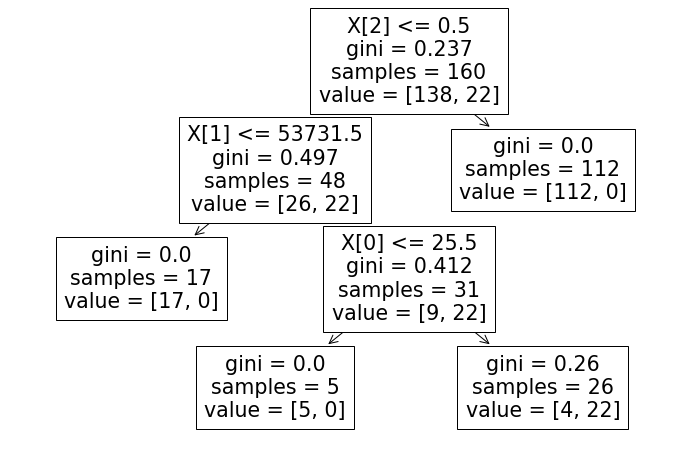

In [15]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))